# 1. 项目介绍

由于传统的运营手段多基于经验判断，或者仅采用较为简单的对比分析来指导业务。本次数据分析希望能够通过科学手段，分析出业务数据之间更为隐性的数据联系，在传统的运营方法之外，给与一些科学的指导。

本项目主要基于用户2021年的消费数据，对其消费行为采取了包括个体及整体分析、消费的时间分析、用户细分分析、复购率和回购率分析、生命周期和购买周期分析等在内的分析手段，并据此得出了一些指导性的意见。

# 2. 数据预处理

## 2.1 数据读取

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
order_data_original = pd.read_excel("order2021.xlsx").copy()

## 2.2 数据清洗

### 2.2.1 数据整齐度评估

In [3]:
#随机查看5行数据的数据格式
order_data_original.sample(5)

,订单顺序编号,订单号,用户名,商品编号,订单金额,付款金额,渠道编号,平台类型,下单时间,付款时间,是否退款
51543,101421,sys-2021-286991668,user-106498,PR000628,530.89,530.89,渠道9,APP,2021-12-23 12:54:23,2021-12-23 12:54:37,否
42620,24482,sys-2021-276925541,user-135516,PR000904,2005.49,1713.23,渠道9,APP,2021-05-01 19:38:23,2021-05-01 19:39:59,否
3126,38831,sys-2021-313992813,user-117513,PR000010,244.12,244.12,渠道1,微信公众号,2021-06-14 16:37:54,2021-06-14 16:38:09,否
88379,45925,sys-2021-296932460,user-119986,PR000720,2277.90,2049.67,渠道14,微信公众号,2021-07-04 21:17:00,2021-07-04 21:17:14,否
23389,50273,sys-2021-225441543,user-116118,PR000548,345.63,345.63,渠道5,淘宝,2021-07-20 10:14:50,2021-07-20 10:15:23,否


从随机取出的5行数据来看，数据满足一列只有一个变量，一个单元格只有一个值的要求，整齐度良好

### 2.2.2 数据干净度评估

In [4]:
order_data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104557 entries, 0 to 104556
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   订单顺序编号  104557 non-null  int64         
 1   订单号     104557 non-null  object        
 2   用户名     104557 non-null  object        
 3   商品编号    104557 non-null  object        
 4   订单金额    104557 non-null  float64       
 5   付款金额    104557 non-null  float64       
 6   渠道编号    104549 non-null  object        
 7   平台类型    104557 non-null  object        
 8   下单时间    104557 non-null  datetime64[ns]
 9   付款时间    104557 non-null  datetime64[ns]
 10  是否退款    104557 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(6)
memory usage: 8.8+ MB


可以看到数据的渠道编号存在一些缺失值；数据的订单顺序编号应该转换为string,渠道编号、平台类型、是否退款可以转化为Category类型，节约存储空间

### 2.2.3 处理缺失数据

In [5]:
#查看渠道编号缺失的数据
order_data_original[order_data_original["渠道编号"].isnull()]

,订单顺序编号,订单号,用户名,商品编号,订单金额,付款金额,渠道编号,平台类型,下单时间,付款时间,是否退款
104549,11598,sys-2021-353765060,user-120690,PR000297,534.12,477.100000,NaN,web网站,2021-03-02 10:11:38,2021-03-02 10:11:55,否
104550,11639,sys-2021-339868263,user-264491,PR000714,206.33,206.330000,NaN,微信公众号,2021-03-02 14:02:58,2021-03-02 14:03:22,否
104551,14234,sys-2021-313502796,user-180054,PR000423,669.09,669.090000,NaN,微信公众号,2021-03-16 15:13:31,2021-03-16 15:13:55,否
104552,35716,sys-2021-300339928,user-270141,PR000984,328.83,295.470000,NaN,微信公众号,2021-06-06 11:03:46,2021-06-06 11:04:19,否
104553,55444,sys-2021-286784634,user-183770,PR000987,488.07,476.810000,NaN,APP,2021-08-04 18:53:34,2021-08-04 18:53:49,否
104554,62378,sys-2021-288609013,user-213725,PR000845,1316.69,10496.526809,NaN,微信公众号,2021-08-26 23:55:30,2021-08-26 23:56:57,否
104555,77890,sys-2021-251942165,user-100835,PR000263,3613.63,3545.980000,NaN,微信公众号,2021-10-15 22:59:12,2021-10-15 22:59:28,否
104556,86627,sys-2021-322891956,user-116711,PR000676,802.18,748.850000,NaN,微信公众号,2021-11-13 00:06:21,2021-11-13 00:06:39,否


In [6]:
#汇总渠道编号缺失的数据数量
order_data_original["渠道编号"].isnull().info()

<class 'pandas.core.series.Series'>
RangeIndex: 104557 entries, 0 to 104556
Series name: 渠道编号
Non-Null Count   Dtype
--------------   -----
104557 non-null  bool 
dtypes: bool(1)
memory usage: 102.2 KB


可以发现渠道编号存在缺失的数据数量较少,仅有8条，可以考虑将其删除

In [7]:
#删除渠道编号为null的数据
order_data_original = order_data_original[~order_data_original["渠道编号"].isnull()]

### 2.2.4 转换数据类型

In [8]:
order_data_original["订单顺序编号"] = order_data_original["订单顺序编号"].astype("str")
order_data_original["渠道编号"] = order_data_original["渠道编号"].astype("category")
order_data_original["平台类型"] = order_data_original["平台类型"].astype("category")
order_data_original["是否退款"] = order_data_original["是否退款"].astype("category")

In [9]:
order_data_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104549 entries, 0 to 104548
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   订单顺序编号  104549 non-null  object        
 1   订单号     104549 non-null  object        
 2   用户名     104549 non-null  object        
 3   商品编号    104549 non-null  object        
 4   订单金额    104549 non-null  float64       
 5   付款金额    104549 non-null  float64       
 6   渠道编号    104549 non-null  category      
 7   平台类型    104549 non-null  category      
 8   下单时间    104549 non-null  datetime64[ns]
 9   付款时间    104549 non-null  datetime64[ns]
 10  是否退款    104549 non-null  category      
dtypes: category(3), datetime64[ns](2), float64(2), object(4)
memory usage: 7.5+ MB


### 2.2.5 处理重复数据

In [10]:
order_data_original["订单顺序编号"].duplicated().sum()

0

原数据不存在订单号重复

### 2.2.6 处理无效或错误数据

In [11]:
order_data_original.describe()

,订单金额,付款金额
count,104549.000000,104549.000000
mean,1049.685715,1167.421759
std,1054.411015,2173.897395
min,6.100000,-12.470000
25%,432.040000,383.660000
50%,679.330000,641.230000
75%,1248.280000,1252.630000
max,28465.250000,83270.053829


在付款金额中，出现了付款金额为负的情况，有必要查看这些异常数据

In [12]:
order_data_original[order_data_original["付款金额"]<0]

,订单顺序编号,订单号,用户名,商品编号,订单金额,付款金额,渠道编号,平台类型,下单时间,付款时间,是否退款
23860,66573,sys-2021-288096069,user-186966,PR000511,136.99,-12.34,渠道5,APP,2021-09-08 21:32:54,2021-09-08 21:33:10,否
24753,96939,sys-2021-323229098,user-198083,PR000548,126.92,-11.13,渠道5,APP,2021-12-10 14:24:13,2021-12-10 14:24:26,是
29600,31393,sys-2021-296608442,user-212991,PR000385,112.91,-10.17,渠道7,APP,2021-05-24 08:52:04,2021-05-24 08:52:23,否
35486,999,sys-2021-324068352,user-112962,PR000602,364.08,-12.47,渠道8,微信公众号,2021-01-04 10:47:05,2021-01-04 10:47:05,否
62781,72266,sys-2021-316685479,user-189901,PR000554,2287.74,-10.98,渠道11,微信公众号,2021-09-28 11:57:46,2021-09-28 11:57:46,否
71784,18684,sys-2021-311194385,user-110299,PR000797,118.06,-10.08,渠道13,web网站,2021-04-06 11:20:43,2021-04-06 11:21:31,否


In [13]:
order_data_original[order_data_original["付款金额"]<0].iloc[:,1].count()

6

共存在6行异常值，可以将其剔除，对样本整体影响不大

In [14]:
order_data_original = order_data_original[order_data_original["付款金额"]>=0]

### 2.2.7 处理不一致数据

观察变量，看是否有多个不同数据指代一个值的情况

In [15]:
order_data_original["商品编号"].value_counts()

PR000895    354
PR000762    350
PR000103    335
PR000587    303
PR000385    302
           ... 
PR000347     21
PR000597     19
PR000468     18
PR000986     16
PR001000     13
Name: 商品编号, Length: 1001, dtype: int64

In [16]:
order_data_original["渠道编号"].value_counts()

渠道13    16850
渠道15    12606
渠道9     12310
渠道11     9493
渠道7      8397
渠道1      8350
渠道14     6301
渠道4      6173
渠道10     4267
渠道2      4223
渠道8      4162
渠道3      3169
渠道12     3100
渠道5      3059
渠道6      2083
Name: 渠道编号, dtype: int64

In [17]:
order_data_original["平台类型"].value_counts()

APP      52444
微信公众号    42940
web网站     7052
淘宝        2017
微信小商店       87
wap网站        3
Name: 平台类型, dtype: int64

In [18]:
order_data_original["是否退款"].value_counts()

否    90763
是    13780
Name: 是否退款, dtype: int64

不存在多个数据指代同一个变量的情况

## 2.2.8 创建新指标

生成订单需要看付款时间，且我们并不关注具体的几时几分，精确到日就行，因此可以对付款时间进行转换；同时我们也想对交易月份进行探索，可以提取订单日期中的年月

In [19]:
order_data_original["订单日期"] = pd.to_datetime(order_data_original["付款时间"], format="%Y-%m-%d").dt.date
order_data_original["交易月份"] = pd.to_datetime(order_data_original["付款时间"], format="%Y-%m-%d").astype("datetime64[M]")

## 2.3 另存清洗完成的数据并读取

In [20]:
order_data_original.to_excel("order_data_cleaned.xlsx",index=False)

In [21]:
order_data_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104543 entries, 0 to 104548
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   订单顺序编号  104543 non-null  object        
 1   订单号     104543 non-null  object        
 2   用户名     104543 non-null  object        
 3   商品编号    104543 non-null  object        
 4   订单金额    104543 non-null  float64       
 5   付款金额    104543 non-null  float64       
 6   渠道编号    104543 non-null  category      
 7   平台类型    104543 non-null  category      
 8   下单时间    104543 non-null  datetime64[ns]
 9   付款时间    104543 non-null  datetime64[ns]
 10  是否退款    104543 non-null  category      
 11  订单日期    104543 non-null  object        
 12  交易月份    104543 non-null  datetime64[ns]
dtypes: category(3), datetime64[ns](3), float64(2), object(5)
memory usage: 9.1+ MB


In [22]:
order_data_cleaned = pd.read_excel("order_data_cleaned.xlsx")
order_data_cleaned.head()

,订单顺序编号,订单号,用户名,商品编号,订单金额,付款金额,渠道编号,平台类型,下单时间,付款时间,是否退款,订单日期,交易月份
0,8,sys-2021-306447069,user-104863,PR000499,499.41,480.42,渠道1,微信公众号,2021-01-01 01:05:50,2021-01-01 01:06:17,否,2021-01-01,2021-01-01
1,11,sys-2021-417411381,user-181957,PR000483,279.53,279.53,渠道1,APP,2021-01-01 01:36:17,2021-01-01 01:36:56,否,2021-01-01,2021-01-01
2,61,sys-2021-313655292,user-282453,PR000154,1658.95,1653.91,渠道1,微信公众号,2021-01-01 12:01:04,2021-01-01 12:03:20,否,2021-01-01,2021-01-01
3,78,sys-2021-311884106,user-167776,PR000215,343.25,337.12,渠道1,APP,2021-01-01 12:47:02,2021-01-01 12:47:21,否,2021-01-01,2021-01-01
4,81,sys-2021-375273222,user-138024,PR000515,329.04,329.04,渠道1,APP,2021-01-01 12:50:23,2021-01-01 12:50:50,否,2021-01-01,2021-01-01


In [23]:
order_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104543 entries, 0 to 104542
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   订单顺序编号  104543 non-null  int64         
 1   订单号     104543 non-null  object        
 2   用户名     104543 non-null  object        
 3   商品编号    104543 non-null  object        
 4   订单金额    104543 non-null  float64       
 5   付款金额    104543 non-null  float64       
 6   渠道编号    104543 non-null  object        
 7   平台类型    104543 non-null  object        
 8   下单时间    104543 non-null  datetime64[ns]
 9   付款时间    104543 non-null  datetime64[ns]
 10  是否退款    104543 non-null  object        
 11  订单日期    104543 non-null  datetime64[ns]
 12  交易月份    104543 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(2), int64(1), object(6)
memory usage: 10.4+ MB


# 2.3.1 拆分数据集

拆分数据集，方便我们针对是否退款进行更精确的分析

In [24]:
#未发生退款数据集
order_data_cleaned_success = order_data_cleaned.query("是否退款 == '否'")
#发生退款数据集
order_data_cleaned_refund = order_data_cleaned.query("是否退款 == '是'")

# 3. 数据可视化探索性分析

In [25]:
#准备参数设置
plt.rcParams["font.family"] = ["Microsoft Yahei"]
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["figure.autolayout"] = True
sns.set_palette("pastel")

## 3.1 总体分析

### 3.1.1 订单金额和付款金额分布情况

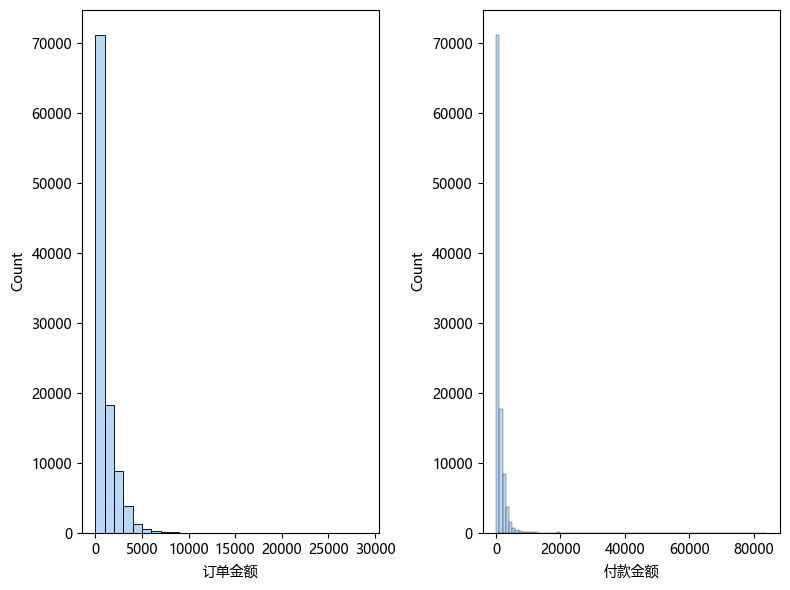

In [26]:
figure,axes = plt.subplots(1,2)
sns.histplot(data=order_data_cleaned,x="订单金额",ax=axes[0],binwidth=1000)
sns.histplot(data=order_data_cleaned,x="付款金额",ax=axes[1],binwidth=1000)
plt.show()

订单金额和付款金额均呈现右偏态分布，订单金额和付款金额多小于3000,说明后续营销活动需要瞄准的客户群体，多集中于中低产人群，可以在后续的营销活动中将重点营销商品或者套装所属的价格段控制在这个范围内。

### 3.1.2 季节性分析

按月维度汇总，统计购买数量、消费金额、消费次数、消费人数，分析商品整体销售情况的季节性

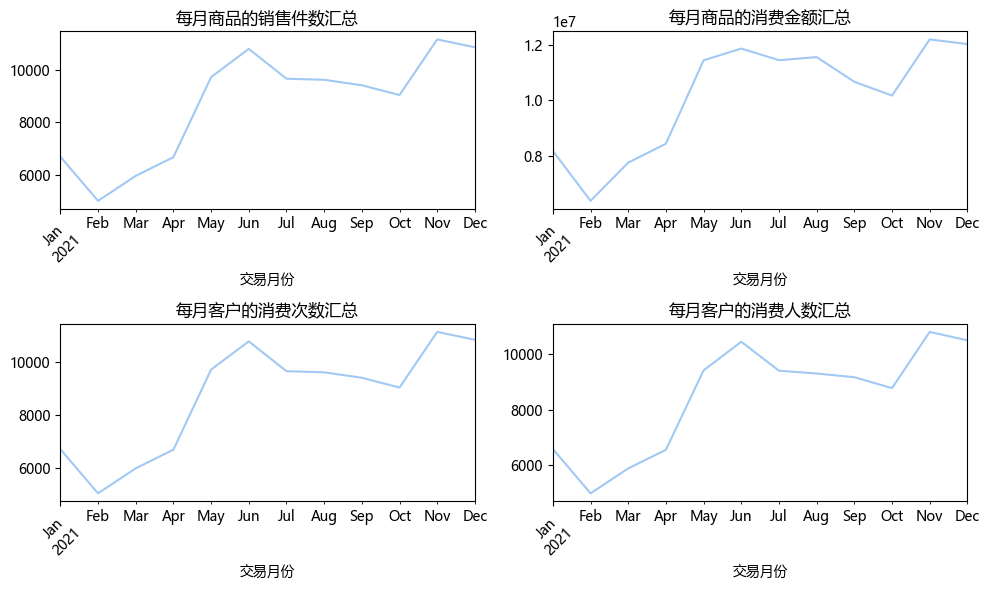

In [27]:
plt.figure(figsize=(10, 6))

#每月销售件数分析
plt.subplot(221)
order_data_cleaned.groupby("交易月份")["商品编号"].count().plot()
plt.xticks(rotation=45)
plt.title("每月商品的销售件数汇总")
plt.tight_layout()

#每月消费金额分析
plt.subplot(222)
order_data_cleaned.groupby("交易月份")["付款金额"].sum().plot()
plt.xticks(rotation=45)
plt.title("每月商品的消费金额汇总")
plt.tight_layout()

#每月客户消费次数分析
plt.subplot(223)
order_data_cleaned.groupby("交易月份")["用户名"].count().plot()
plt.xticks(rotation=45)
plt.title("每月客户的消费次数汇总")
plt.tight_layout()

#每月消费人数分析
plt.subplot(224)
order_data_cleaned.groupby("交易月份")["用户名"].apply(lambda x:len(x.drop_duplicates())).plot()
plt.xticks(rotation=45)
plt.title("每月客户的消费人数汇总")
plt.tight_layout()

无论是从商品销售的角度，还是用户消费的角度来看，本店的消费情况均呈现出明显的淡旺季，1-3月是淡季，4-12月是旺季，尤其是5-7月和11-12月是销售的高峰，这段时间可以加大营销力度，可以将淡季的部分推广预算挪用到旺季，并且提醒仓储做好淡旺季的囤货准备。

## 3.2 CRM分析

### 3.2.1 首次购买时间和最后购买时间分析

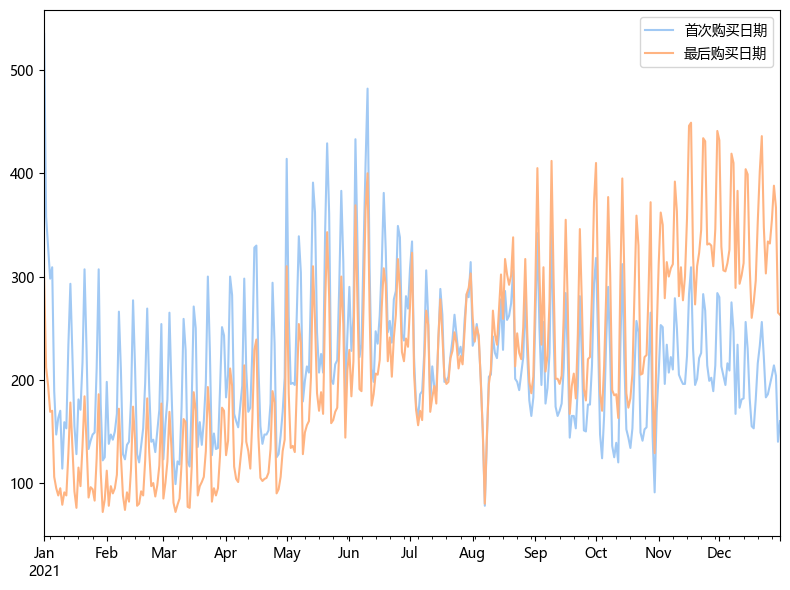

In [28]:
fig, ax = plt.subplots()

first_order_person = order_data_cleaned.groupby(by='用户名')['订单日期'].min().value_counts().sort_index()
last_order_person = order_data_cleaned.groupby(by='用户名')['订单日期'].max().value_counts().sort_index()
first_order_person.plot(ax=ax,label="首次购买日期")
last_order_person.plot(ax=ax,label="最后购买日期")
ax.legend()
plt.show()

年初至年中的首次购买客户，即1-6月的新客户呈现不断上升的趋势，但7月后则一路回落；而最后一次购买的客户呈现不断增加的态势。可能是前半年运营采用了较多的拉新手段，后半年则专注于对老客户的运营，增加了老客户的留存，逐渐培养起了客户的忠诚度。

并且可以看到首次购买客户的曲线存在两个峰值，一个是1月，一个是6月，可以在这两个月加大拉新力度，在其他月份则可以适当把预算分配给客户留存。

## 3.3 退货率分析

### 3.3.1 查看是否退款比例

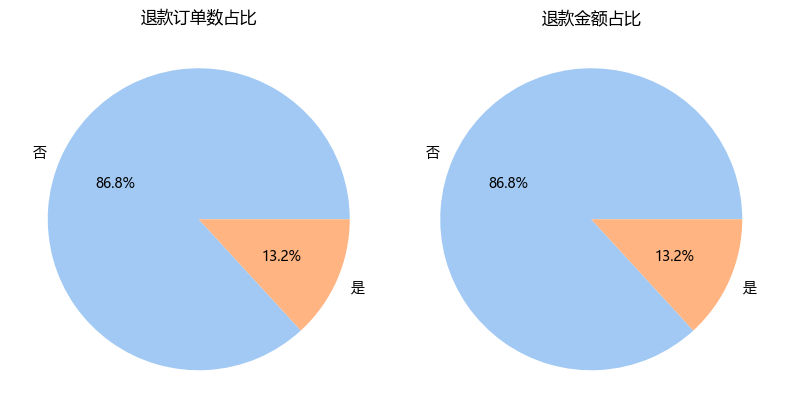

In [29]:
figure,axes = plt.subplots(1,2)
refund_count = order_data_cleaned["是否退款"].value_counts()
refund_count_label = refund_count.index
axes[0].pie(refund_count,labels=refund_count_label,autopct="%.1f%%")
axes[0].set_title("退款订单数占比")

refund_sum = order_data_cleaned.groupby("是否退款")["付款金额"].sum()
refund_sum_label = refund_sum.index
axes[1].pie(refund_sum,labels=refund_sum_label,autopct="%.1f%%")
axes[1].set_title("退款金额占比")
plt.show()

退款订单无论是数量还是金额都约占13.2%,退款率较为良好，说明运营状况较为健康

### 3.3.2 退货时序分析

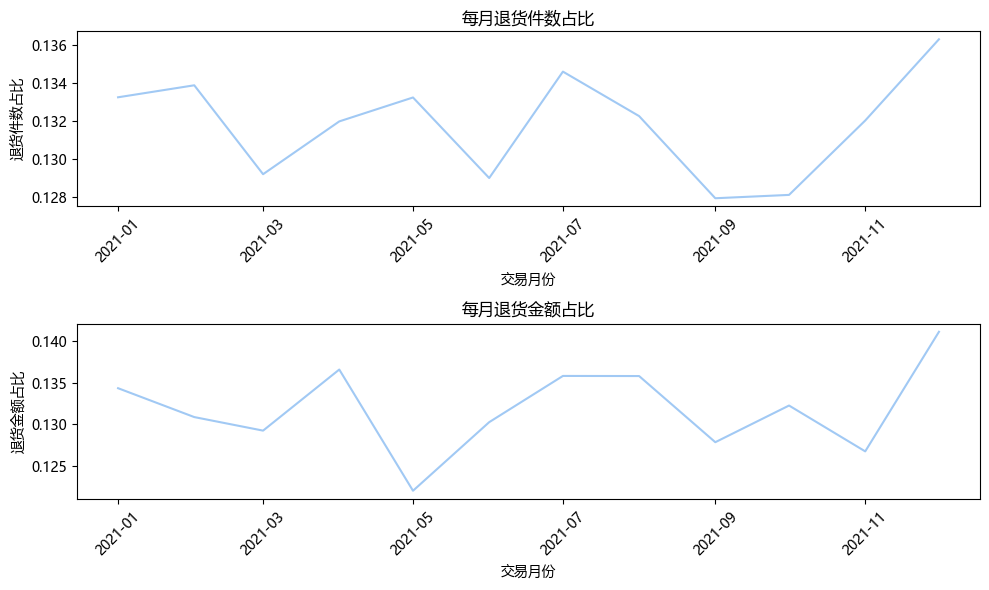

In [30]:
plt.figure(figsize=(10, 6))

#绘制每月退货件数占比折线图
plt.subplot(211)
pivot_refund_order = pd.pivot_table(data=order_data_cleaned,values="订单号",index="交易月份",columns="是否退款",aggfunc="count")
pivot_refund_order["退货件数占比"] = pivot_refund_order["是"]/(pivot_refund_order["否"]+pivot_refund_order["是"])
plt.plot(pivot_refund_order.index,pivot_refund_order["退货件数占比"])
plt.xlabel("交易月份")
plt.ylabel("退货件数占比")
plt.title("每月退货件数占比")
plt.xticks(rotation=45)
plt.tight_layout()

#绘制每月退货金额占比折线图
plt.subplot(212)
pivot_refund_amount = pd.pivot_table(data=order_data_cleaned,values="付款金额",index="交易月份",columns="是否退款",aggfunc="sum")
pivot_refund_amount["退货金额占比"] = pivot_refund_amount["是"]/(pivot_refund_amount["否"]+pivot_refund_amount["是"])
plt.plot(pivot_refund_amount.index,pivot_refund_amount["退货金额占比"])
plt.xlabel("交易月份")
plt.ylabel("退货金额占比")
plt.title("每月退货金额占比")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

根据每个月退货件数占比的折线图，可以发现每个月的退货率都较为稳定，均在13.2%附近徘徊，波动较小，较为健康。

根据每个月退货金额占比的折线图，相较于每月退货件数占比而言，退货金额占比的波动更大一些，总体也是维持在一个健康的范围内。

但是两张折线图都反映出了12月份的退货情况无论是在件数上，还是在金额上都有所增加，这需要引起警惕。

## 3.4 各个渠道拆解

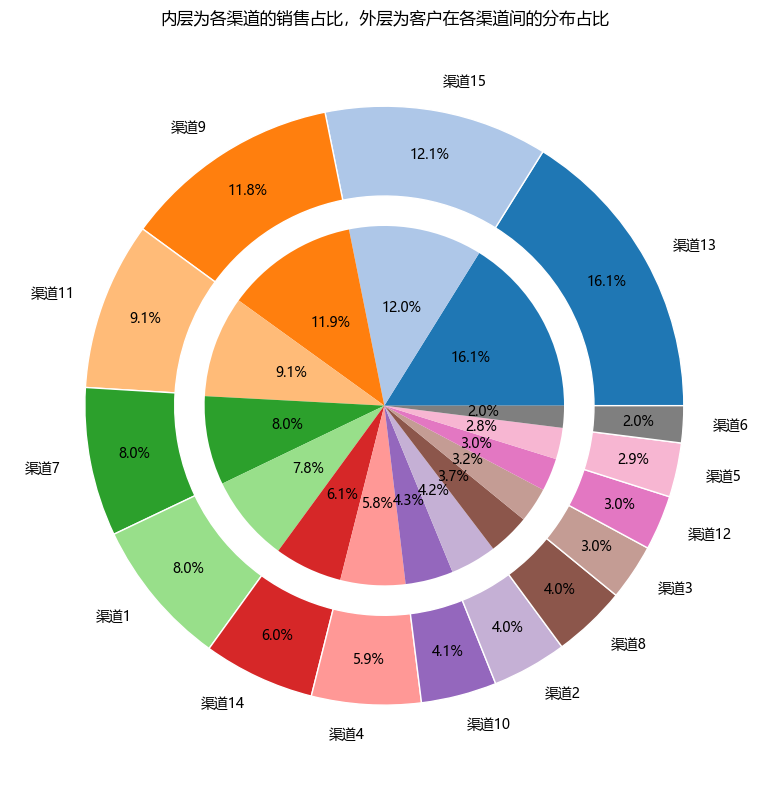

In [31]:
fig, ax = plt.subplots(figsize=(8, 8))

#内层饼图表示各渠道销售占比
channel_GMV = order_data_cleaned.groupby("渠道编号")["付款金额"].sum().sort_values(ascending=False)
colors = plt.cm.tab20(range(len(channel_GMV))) 
inner_pie = ax.pie(channel_GMV,radius=0.6, autopct="%.1f%%", pctdistance=0.55,colors=colors)
#外层圆环图表示各渠道客户分布占比
channel_customer = order_data_cleaned.groupby("渠道编号")["用户名"].count().sort_values(ascending=False)
ax.pie(channel_customer,radius=1,autopct="%.1f%%",labels=channel_customer.index,pctdistance=0.85, wedgeprops=dict(width=0.3, edgecolor='w'), colors=colors)

ax.set_title("内层为各渠道的销售占比，外层为客户在各渠道间的分布占比")
plt.show()

根据用户占比与渠道销售占比之间的关系，得知不同渠道间的客单价相似，并无明显区别，说明这些渠道间的消费者的消费能力类似。

其中渠道13，渠道15，渠道9和渠道11四个渠道的销售约占总销售的一般，说明这几个渠道的销售效果较好，可以加大这些渠道的建设。

## 3.5 各个平台拆解

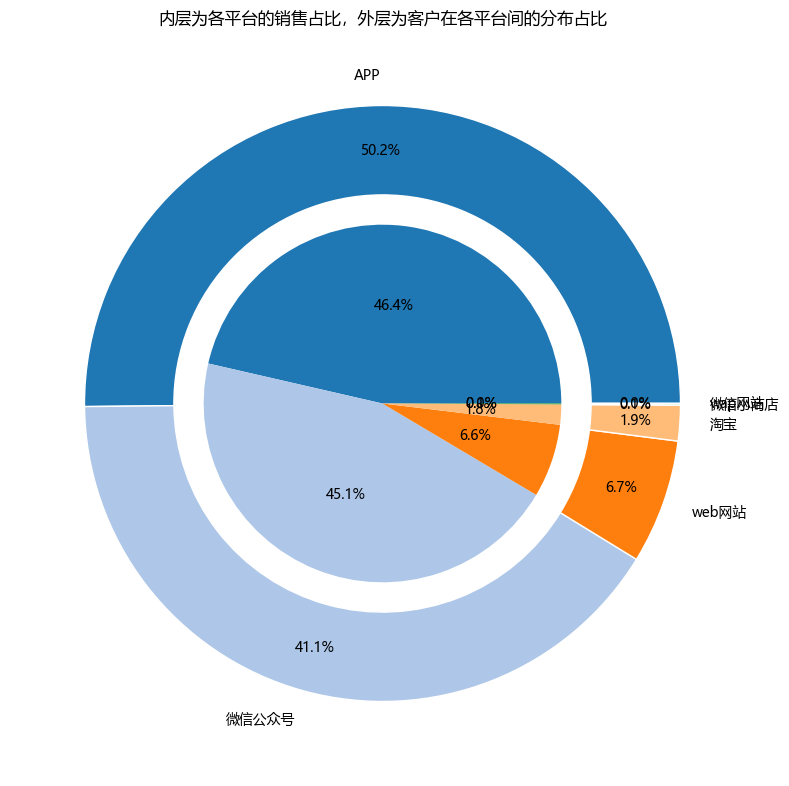

In [32]:
fig, ax = plt.subplots(figsize=(8, 8))

#内层饼图表示各渠道销售占比
stage_GMV = order_data_cleaned.groupby("平台类型")["付款金额"].sum().sort_values(ascending=False)
colors = plt.cm.tab20(range(len(stage_GMV))) 
inner_pie = ax.pie(stage_GMV,radius=0.6, autopct="%.1f%%", pctdistance=0.55,colors=colors)
#外层圆环图表示各渠道客户分布占比
stage_customer = order_data_cleaned.groupby("平台类型")["用户名"].count().sort_values(ascending=False)
ax.pie(stage_customer,radius=1,autopct="%.1f%%",labels=stage_customer.index,pctdistance=0.85, wedgeprops=dict(width=0.3, edgecolor='w'), colors=colors)

ax.set_title("内层为各平台的销售占比，外层为客户在各平台间的分布占比")
plt.tight_layout() 
plt.show()

根据各平台销售占比及其所对应的客户分布占比，可以看到，APP和微信公众号是我们的主要传播平台和收入贡献来源，但是和APP所对应的人群占比相比，其销售占比还有待提升，可以加大这方面的投入，开发APP端的更多功能，优化购物体验，推出更多优惠方案和复购激励，促进该平台上用户的转化，拉高该平台的客单价。同时微信小商店和wap网站的人数和销售额占比都较小，可以减少这两个平台的投入。

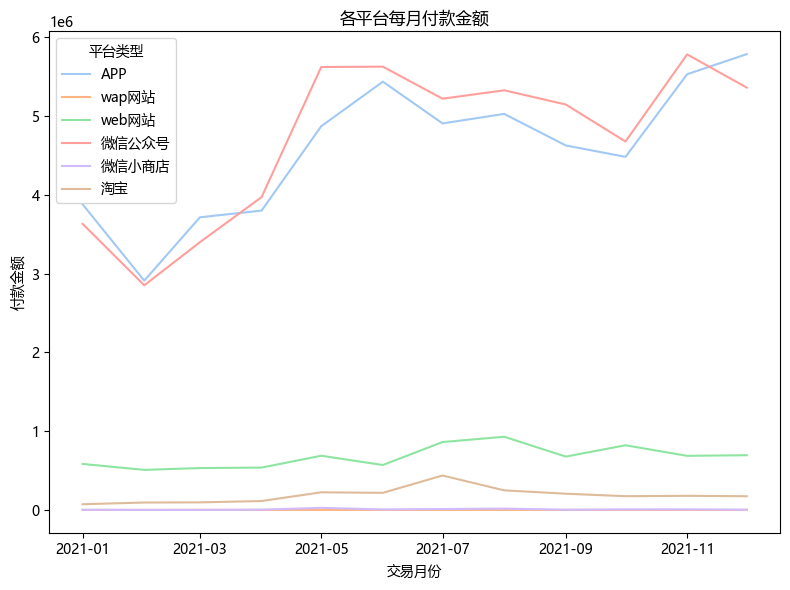

In [33]:
pivot_stage_order = pd.pivot_table(data=order_data_cleaned,index="交易月份",columns="平台类型",values="付款金额",aggfunc="sum").fillna(0)
for column in pivot_stage_order.columns:
    plt.plot(pivot_stage_order.index, pivot_stage_order[column], label=column)
plt.legend(title="平台类型")
plt.title("各平台每月付款金额")
plt.xlabel("交易月份")
plt.ylabel("付款金额")
plt.show()

可以看到虽然APP和公众号作为两个GMV占比贡献最大的平台，但是它们在1-4月的发力是较为疲软的，可以针对性的在1-4月多推出一些日销活动，促进该段时间内的转化提升

# 4.数据分析

## 4.1 商品分析

### 4.1.1 查看最热销的商品

In [34]:
product_counts = order_data_cleaned.groupby("商品编号")["订单号"].count().sort_values(ascending=False).reset_index().rename(columns={"订单号": "下单件数"})
product_counts

,商品编号,下单件数
0,PR000895,354
1,PR000762,350
2,PR000103,335
3,PR000587,303
4,PR000060,302
...,...,...
996,PR000347,21
997,PR000597,19
998,PR000468,18
999,PR000986,16


In [35]:
product_counts['下单件数累加']  = product_counts["下单件数"].cumsum()
product_counts['下单件数累计占比']  = product_counts["下单件数累加"]/product_counts['下单件数累加'].max()
product_counts[product_counts["下单件数累计占比"]<0.2]

,商品编号,下单件数,下单件数累加,下单件数累计占比
0,PR000895,354,354,0.003386
1,PR000762,350,704,0.006734
2,PR000103,335,1039,0.009938
3,PR000587,303,1342,0.012837
4,PR000060,302,1644,0.015726
...,...,...,...,...
88,PR000871,177,20081,0.192084
89,PR000687,176,20257,0.193767
90,PR000906,175,20432,0.195441
91,PR000818,175,20607,0.197115


In [36]:
product_counts[product_counts["下单件数累计占比"]<0.2]["商品编号"].to_excel("hot_product.xlsx",index=False)

根据各个商品在下单总件数中的占比，选取累计下单占比在前20%的商品，共有93件商品，说明这93款产品较为热销，可以将它们与其他商品一起设置为套装，用这些产品的热度来带动其他产品的销量,名单在hot_product.xlsx中。

### 4.1.2 退货率较高商品预警

In [51]:
total_orders = order_data_cleaned.groupby("商品编号").size()
refunded_orders_count = order_data_cleaned_refund.groupby("商品编号").size()

In [53]:
refund_rate = (refunded_orders_count / total_orders).sort_values(ascending=False)
refund_rate

商品编号
PR000309    0.368421
PR000676    0.311111
PR000147    0.308824
PR001000    0.307692
PR000958    0.285714
              ...   
PR000478    0.032258
PR000136    0.032258
PR000966    0.026316
PR000210    0.026316
PR000440    0.016667
Length: 1001, dtype: float64

In [65]:
refund_rate[refund_rate>0.20].count()

32

In [70]:
refund_product = refund_rate[refund_rate>0.20].reset_index()
refund_product["商品编号"].to_excel("refund_product.xlsx",index=False)

把退货率超过20%作为预警线，共有32款产品需要预警，最高的退货率达到了36.8%，有必要对高退货的产品进行现有运营策略的调整，若非运营问题则可考虑推广方式是否有误，或者当前产品是否存在质量不佳、货不对板的情况，有必要减少囤货,名单已输出至refund_product.xlsx中

## 4.2 CRM分析

### 4.2.1 RFM模型

In [83]:
RFM = pd.pivot_table(data=order_data_cleaned,index="用户名",values=["订单日期","订单号","付款金额"],aggfunc={"订单日期":"max","订单号":"count", "付款金额":"sum"}).rename(columns={"订单日期": "最后一次下单时间","订单号":"总订单数","付款金额":"消费总额"})
RFM

,消费总额,总订单数,最后一次下单时间
用户名,,,
user-100000,1770.81,1,2021-10-13
user-100003,511.59,1,2021-05-24
user-100006,2771.98,2,2021-11-14
user-100007,2162.14,1,2021-01-14
user-100008,4879.94,1,2021-11-16
...,...,...,...
user-299980,719.77,2,2021-10-18
user-299983,706.80,1,2021-12-27
user-299989,1637.47,2,2021-11-11


In [84]:
RFM["R"] =  -(RFM["最后一次下单时间"] - RFM["最后一次下单时间"].max())/np.timedelta64(1,"D")
RFM.rename(columns={'总订单数':'F','消费总额':'M'},inplace=True)
RFM = RFM.loc[:,["R","F","M"]]
RFM

,R,F,M
用户名,,,
user-100000,79.0,1,1770.81
user-100003,221.0,1,511.59
user-100006,47.0,2,2771.98
user-100007,351.0,1,2162.14
user-100008,45.0,1,4879.94
...,...,...,...
user-299980,74.0,2,719.77
user-299983,4.0,1,706.80
user-299989,50.0,2,1637.47


In [90]:
#构建RFM判断函数，将用户进行分层，方便后续针对不同用户采取不同运营手段
#由于F值多为1，用户的总体复购频率较少，可以将用户三个指标值减去该列平均值，若大于1则取1，否则取0
def RFM_judge(x):#将数据按列传入
    level = x.apply(lambda x:"1" if x>=1 else "0")
    label = level["R"] + level["F"] + level["M"]
    d = {
        "111":"重要价值客户",
        "011":"重要保持客户",
        "101":"重要发展客户",
        "001":"重要挽留客户",
        "110":"一般价值客户",
        "010":"一般保持客户",
        "100":"一般发展客户",
        "000":"一般挽留客户",
    }
    result = d[label]
    return result
RFM["客户分层"] = RFM[["R","F","M"]].apply(lambda x:x-x.mean()).apply(RFM_judge,axis=1)
RFM

,R,F,M,客户分层
用户名,,,,
user-100000,79.0,1,1770.81,重要挽留客户
user-100003,221.0,1,511.59,一般发展客户
user-100006,47.0,2,2771.98,重要挽留客户
user-100007,351.0,1,2162.14,重要发展客户
user-100008,45.0,1,4879.94,重要挽留客户
...,...,...,...,...
user-299980,74.0,2,719.77,一般挽留客户
user-299983,4.0,1,706.80,一般挽留客户
user-299989,50.0,2,1637.47,重要挽留客户


In [96]:
RFM.groupby("客户分层")["R"].count()

客户分层
一般价值客户       89
一般保持客户      601
一般发展客户    27052
一般挽留客户    27690
重要价值客户      455
重要保持客户     2833
重要发展客户     9132
重要挽留客户    11496
Name: R, dtype: int64

将客户分层结果做统计后，发现绝大部分的重要客户需要我们进行发展和挽留，绝大部分一般客户也是需要挽留和发展的，且重要客户群体仅有总客户群体的约1/3。

可以根据不同客户群体采取不同策略：

1. 重要价值用户，RFM三个值都很高，可以提供VIP服务，可以开设一些专属购买渠道

2. 重要发展用户，消费频率低，但是其他两个值很高，要想办法提高他的消费频率，可以采用积分手段来激励他们的消费

3. 重要保持用户，最近消费时间距离现在较远，也就是R值低，但是消费频率和消费金额高。这种用户，是一段时间没来的忠实客户。可以采用短信或者是类似于千牛的专属客服等手段进行用户触达，提高复购率

4. 重要挽留客户，最近消费时间距离现在较远，消费频率低，但消费金额高。这种用户即将流失，可以主动联系用户，了解他们的评价和感受，调查清楚哪里出了问题，并想办法挽回

5. 一般客户可以采用等级制，激励他们消费

## 4.3 新老客分析

In [100]:
customer_pivot = order_data_cleaned.pivot_table(index="用户名",columns="交易月份",values="订单日期",aggfunc="count").fillna(0)
new_and_old_customer = customer_pivot.applymap(lambda x:1 if x>0 else 0)
new_and_old_customer

交易月份,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01
用户名,,,,,,,,,,,,
user-100000,0,0,0,0,0,0,0,0,0,1,0,0
user-100003,0,0,0,0,1,0,0,0,0,0,0,0
user-100006,0,0,0,0,0,0,0,0,0,1,1,0
user-100007,1,0,0,0,0,0,0,0,0,0,0,0
user-100008,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
user-299980,1,0,0,0,0,0,0,0,0,1,0,0
user-299983,0,0,0,0,0,0,0,0,0,0,0,1
user-299989,0,0,0,1,0,0,0,0,0,0,1,0


In [132]:
#将客户按月维度统计，划分成为四大类：潜在客户、新客、活跃客户、回流客户、老客
def active_status(data):
    status = []
    for i in range(12):
        if data[i] == 0:#当月无消费
            if len(status) == 0:#统计开始的首月无消费
                status.append("potential")#判断为潜在客户
            else:#统计开始的第二个月开始无消费
                if status[i-1] == "potential": #上月判断为潜在客户
                    status.append("potential")#判断为潜在客户
                else:
                    status.append("old")#判断为老客
        else:#当月有消费
            if len(status) == 0:#统计开始的首月有消费
                status.append("new")#判断为新客
            else:#统计开始的第二个月开始有消费
                if status[i-1] == "old":#上个月判断为老客
                    status.append("return")#判断为回流用户
                elif status[i-1] == "potential":#上个月判断为潜在客户
                    status.append("new")#判断为新客
                else:#上个月判断为新客/回流客户/活跃客户
                    status.append("active")#判断为活跃客户
    return pd.Series(status,new_and_old_customer.columns)

new_and_old_customer_status = new_and_old_customer.apply(active_status,axis=1)
new_and_old_customer_status

交易月份,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01
用户名,,,,,,,,,,,,
user-100000,potential,potential,potential,potential,potential,potential,potential,potential,potential,new,old,old
user-100003,potential,potential,potential,potential,new,old,old,old,old,old,old,old
user-100006,potential,potential,potential,potential,potential,potential,potential,potential,potential,new,active,old
user-100007,new,old,old,old,old,old,old,old,old,old,old,old
user-100008,potential,potential,potential,potential,potential,potential,potential,potential,potential,potential,new,old
...,...,...,...,...,...,...,...,...,...,...,...,...
user-299980,new,old,old,old,old,old,old,old,old,return,old,old
user-299983,potential,potential,potential,potential,potential,potential,potential,potential,potential,potential,potential,new
user-299989,potential,potential,potential,new,old,old,old,old,old,old,return,old


In [133]:
new_and_old_customer_status.apply(lambda x:pd.value_counts(x))

交易月份,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01
active,NaN,169.0,147,217,337,551,569,523,483,440,545,578.0
new,6573.0,4794.0,5519,5981,8271,8714,7306,6819,6381,5798,6846,6346.0
old,NaN,6404.0,11020,16325,21718,29395,37750,44671,51186,57379,62188,68839.0
potential,72775.0,67981.0,62462,56481,48210,39496,32190,25371,18990,13192,6346,NaN
return,NaN,NaN,200,344,812,1192,1533,1964,2308,2539,3423,3585.0


In [134]:
#去除掉潜在客户类别，这个没有统计意义
new_and_old_customer_status = new_and_old_customer_status.apply(lambda x:pd.value_counts(x)).drop("potential",axis=0).fillna(0).T
new_and_old_customer_status

,active,new,old,return
交易月份,,,,
2021-01-01,0.0,6573.0,0.0,0.0
2021-02-01,169.0,4794.0,6404.0,0.0
2021-03-01,147.0,5519.0,11020.0,200.0
2021-04-01,217.0,5981.0,16325.0,344.0
2021-05-01,337.0,8271.0,21718.0,812.0
2021-06-01,551.0,8714.0,29395.0,1192.0
2021-07-01,569.0,7306.0,37750.0,1533.0
2021-08-01,523.0,6819.0,44671.0,1964.0
2021-09-01,483.0,6381.0,51186.0,2308.0


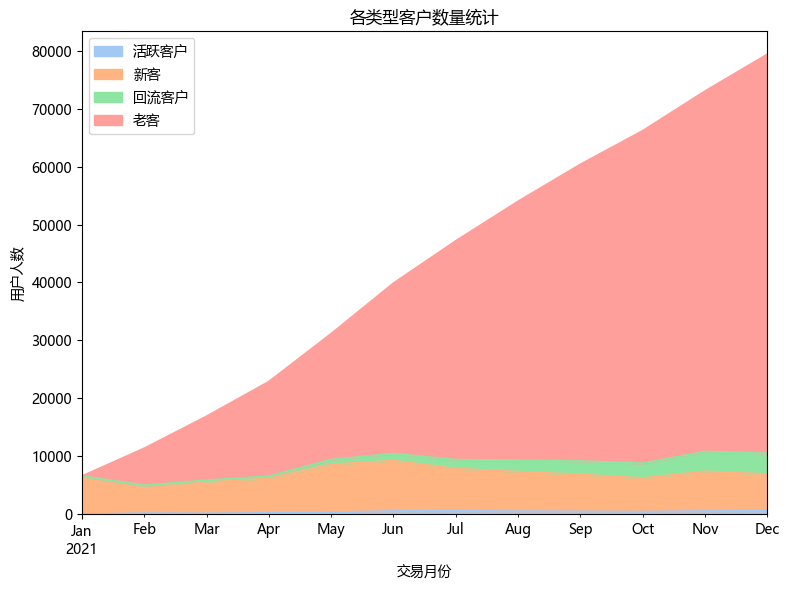

In [139]:
new_and_old_customer_status.reset_index().plot.area(x="交易月份", y=["active","new","return","old"],label=['活跃客户', '新客',"回流客户","老客"])
plt.xlabel("交易月份")
plt.ylabel("用户人数")
plt.title("各类型客户数量统计")
plt.legend()
plt.show()

消费构成主要由新客、活跃客户、回流客户三者所构成。

可以看到从1-12月来，新客都是消费的主力，前5个月的新客消费占比较多，到前6个月，新客都展现出增长的态势，7月后则逐渐回落，一直到9月后，新客的消费趋于稳定。

6月开始，回流客户（即复购的老客）开始发力，持续到12月份，逐渐成为消费群体中的第二主力。

活跃客户则一直较少，但在一直有所增加。

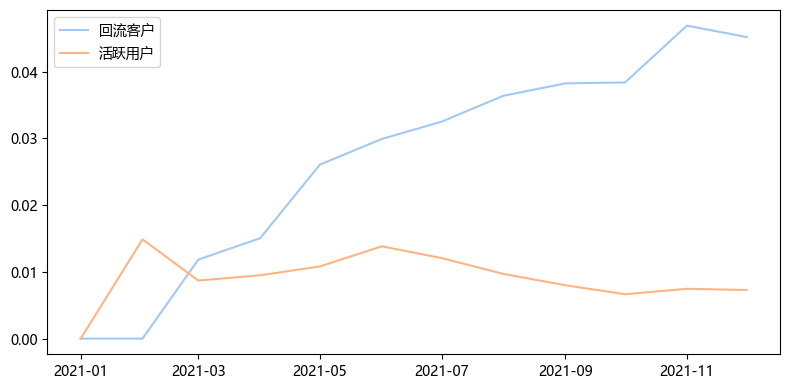

In [141]:
#比较回流客户和活跃客户
plt.figure(figsize=(8,4))
rate = new_and_old_customer_status.apply(lambda x:x/x.sum(),axis=1)
plt.plot(rate["return"],label="回流客户")
plt.plot(rate["active"],label="活跃客户")
plt.legend()

回流客户持续上涨，一方面是由于老客户的增多，另一方面回流活动可能做的比较好

活跃客户前2个月涨势较为厉害，可能这段时间的活动持续性做的较好，后续3至12月则开始回落

## 4.4 客户留存分析

将客户多次发生付款行为发生的时间段距其第一次付款的时间进行划分，这些在统计时间段内存在付款行为的客户为留存客户

### 4.4.1 留存客户活跃天数分析

In [216]:
customer_first_order = order_data_cleaned.groupby("用户名")["订单日期"].min().reset_index().rename(columns={"订单日期":"最早购买日期"})
customer_order = pd.merge(order_data_cleaned,customer_first_order,how="inner",on="用户名")[["用户名","付款金额","订单日期","最早购买日期"]]
customer_order["第n天活跃"] = (customer_order["订单日期"]-customer_order["最早购买日期"]).apply(lambda x:x.days)
bins=[0,3,7,15,30,60,90,180,365]#对活跃天数分箱
customer_order["活跃天数区间"] = pd.cut(customer_order["第n天活跃"],bins=bins)
customer_order

,用户名,付款金额,订单日期,最早购买日期,第n天活跃,活跃天数区间
0,user-104863,480.420000,2021-01-01,2021-01-01,0,NaN
1,user-104863,1213.400000,2021-05-02,2021-01-01,121,"(90.0, 180.0]"
2,user-104863,3159.350000,2021-02-19,2021-01-01,49,"(30.0, 60.0]"
3,user-181957,279.530000,2021-01-01,2021-01-01,0,NaN
4,user-282453,1653.910000,2021-01-01,2021-01-01,0,NaN
...,...,...,...,...,...,...
104538,user-261111,2223.820000,2021-01-01,2021-01-01,0,NaN
104539,user-153117,1273.060000,2021-01-01,2021-01-01,0,NaN
104540,user-141198,2831.172018,2021-01-01,2021-01-01,0,NaN
104541,user-291340,1407.600000,2021-01-01,2021-01-01,0,NaN


In [217]:
customer_order_pivot = customer_order.pivot_table(index="用户名", columns="活跃天数区间",values="付款金额",aggfunc=sum,dropna=False).replace(0, np.nan)
customer_order_pivot

活跃天数区间,"(0, 3]","(3, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
用户名,,,,,,,,
user-100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user-100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user-100006,NaN,NaN,443.55,NaN,NaN,NaN,NaN,NaN
user-100007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user-100008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
user-299980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,389.44
user-299983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user-299989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,527.28


In [221]:
customer_order_pivot.count()/len(customer_order_pivot)

活跃天数区间
(0, 3]        0.005318
(3, 7]        0.006251
(7, 15]       0.012930
(15, 30]      0.022836
(30, 60]      0.041198
(60, 90]      0.039598
(90, 180]     0.097633
(180, 365]    0.070525
dtype: float64

可以看到，我们的总体留存率较低，且大多数的留存客户喜欢在90-180和180-365这个时间段内再次消费，说明我们店内的产品并不属于客户高频购买的产品类型。这从运营角度看，在促活新用户的时，更要注重培养老用户的忠诚度。

### 4.4.2 留存客户客单价分析

In [222]:
customer_order_pivot.mean()

活跃天数区间
(0, 3]        1295.350537
(3, 7]        1252.517830
(7, 15]       1132.070809
(15, 30]      1240.656265
(30, 60]      1237.660823
(60, 90]      1218.704246
(90, 180]     1238.299346
(180, 365]    1269.935267
dtype: float64

可以看到，对不同留存时间段的客户的消费金额做平均，得到消费的客单价，可以发现活跃天数间隔在0-3和3-7天客户的客单是较高的，用户越活跃，他们更乐意消费。因此可以在新客发生首次购买后的7天内，多采用一些促活手段，形成针对我们品牌的认可，保持长期活跃。

## 4.5 复购率分析

分析每个月多次消费的客户在总客户中的占比

In [226]:
month_buy_rate = pd.DataFrame(((customer_pivot > 1).sum() / (customer_pivot >= 1).sum()), columns=["复购率"])
month_buy_rate

,复购率
交易月份,
2021-01-01,0.018409
2021-02-01,0.011485
2021-03-01,0.017218
2021-04-01,0.020483
2021-05-01,0.030892
2021-06-01,0.030697
2021-07-01,0.025510
2021-08-01,0.031593
2021-09-01,0.024858


根据复购率的结果显示，前3个月的复购率不佳，后续月份回升并稳定在2.5%-3%左右。说明前3个月的客户主要由新客组成。

## 4.6 回购率分析

分析本月消费后，下个月也存在消费行为的客户在所有客户中的比例

In [242]:
def func_buy_again(data):
    status = []
    for i in range(data.count()-1):# 判断前11个月
        if data[i] > 0:# 本月有消费
            if data[i+1] > 0:# 下个月也消费，则为回购，即为1
                status.append(1)
            else:# 下个月不消费，不回购，记为0
                status.append(0)
        else:
            status.append(np.nan)# 本月无消费，赋予为NaN，count不统计
    status.append(np.nan)# 最后一个月补充为NaN，因为没有下一月数据，无法判断是否回购
    return pd.Series(status,index=data.index)
re_buy = customer_pivot.apply(func_buy_again,axis=1)
re_buy

交易月份,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01
用户名,,,,,,,,,,,,
user-100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
user-100003,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user-100006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN
user-100007,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user-100008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
user-299980,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
user-299983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user-299989,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [246]:
re_buy_rate = pd.DataFrame(re_buy.sum()/re_buy.count(),columns=['回购率'])
re_buy_rate

,回购率
交易月份,
2021-01-01,0.025711
2021-02-01,0.029619
2021-03-01,0.036993
2021-04-01,0.051513
2021-05-01,0.058493
2021-06-01,0.054413
2021-07-01,0.055591
2021-08-01,0.051902
2021-09-01,0.047972


可以得知前3个月回购率较差，说明前3个月涌入的新客大部分只做了一次消费，这可能是由于这批新客并不符合我们的用户画像所导致的。后续的回购率回升，但波动较大。

# 5.结论

总结以上分析：
1. 我们的客户群体的消费多集中于0-3000部分，每次营销活动可以控制主推的商品或者套装价格位于这个价格区间内。
2. 我们的商品存在明显的销售淡旺季，1-3月是淡季，4-12月是旺季，尤其是5-7月和11-12月是销售的高峰，需要针对以上时间做出运营策略的调整和仓储准备
3. 新客涌入有两个高峰一个是1月，一个是6月，可以在这两个月加大拉新力度，在其他月份则可以适当把预算分配给客户留存
4. 12月份的退货情况无论是在件数上，还是在金额上都有所增加，这需要引起警惕
5. 渠道13，渠道15，渠道9和渠道11四个渠道的销售效果较好，可以加大这些渠道的建设
6. 优化APP端的购物体验，激发它的对应消费群体的潜能，促进该平台上用户的转化，拉高该平台的客单价。同时可以减少微信小商店和wap网站的投入。
7. APP和公众号在1-4月的发力较为疲软，可以针对性的在1-4月多推出一些日销活动，促进该段时间内的转化提升
8. 共有93件热销商品，可以将它们与其他商品一起设置为套装，用这些产品的热度来带动其他产品的销量
9. 共有32款产品需要预警，有必要对高退货的产品进行现有运营策略的调整，若非运营问题则可考虑推广方式是否有误，或者当前产品是否存在质量不佳、货不对板的情况，同时减少囤货
10. 将客户进行分层后针对不同客户采取不同策略：
    - 重要价值客户，RFM三个值都很高，可以提供VIP服务，可以开设一些专属购买渠道

    - 重要发展客户，消费频率低，但是其他两个值很高，要想办法提高他的消费频率，可以采用积分手段来激励他们的消费

    - 重要保持客户，最近消费时间距离现在较远，也就是R值低，但是消费频率和消费金额高。这种用户，是一段时间没来的忠实客户。可以采用短信或者是类似于千牛的专属客服等手段进行用户触达，提高复购率

    - 重要挽留客户，最近消费时间距离现在较远，消费频率低，但消费金额高。这种用户即将流失，可以主动联系用户，了解他们的评价和感受，调查清楚哪里出了问题，并想办法挽回

    - 一般客户可以采用等级制，激励他们消费
11. 3-12月间可以考虑做一些活动持续时间较长的活动
12. 运营在促活新用户的时，更要注重培养老用户的忠诚度
13. 可以在新客发生首次购买后的7天内，多采用一些促活手段，形成针对我们品牌的认可，保持长期活跃
14. 拉新时要注意匹配用户画像，来提高回购率